<a href="https://colab.research.google.com/github/Chaa00/MNIST-Tensorflow/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
mnist=tf.keras.datasets.mnist 
(images,targets),(images_test,target_test)=mnist.load_data()
images=images[:10000]
targets=targets[:10000]
print(images.shape)
print(targets.shape)

11493376/11490434 [==============================] - 0s 0us/step
(10000, 28, 28)
(10000,)


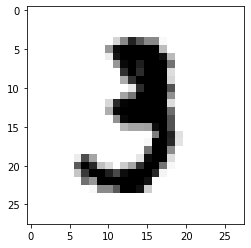

In [3]:
plt.imshow(images[10],cmap='binary')
plt.show()

In [4]:
print(targets[10])

3


In [5]:
print("first ligne of our image is" , images[10][0])
print("the target associated to this image is " , targets[10])
print(images[10])

first ligne of our image is [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
the target associated to this image is  3
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244

In [6]:
#create the model 
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
print("the shape before flatten is ", images [0:1].shape)
model_output=model.predict(images[0:1])
print("the shape after flatten is ", model_output.shape)

the shape before flatten is  (1, 28, 28)
the shape after flatten is  (1, 784)


In [7]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(254, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(117,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model_output=model.predict(images[0:1])
print(model_output,targets[0:1])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.4994061e-12 1.0000000e+00 0.0000000e+00]] [5]


In [8]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=['accuracy'])
history=model.fit(images,targets,epochs=10)
              

Epoch 1/10
313/313 [==============================] - 1s 3ms/step - loss: 5.4299 - accuracy: 0.8229
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.9742 - accuracy: 0.9179
Epoch 3/10
313/313 [==============================] - 1s 3ms/step - loss: 0.5550 - accuracy: 0.9383
Epoch 4/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3437 - accuracy: 0.9542
Epoch 5/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2493 - accuracy: 0.9658
Epoch 6/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3175 - accuracy: 0.9621
Epoch 7/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3052 - accuracy: 0.9630
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3964 - accuracy: 0.9567
Epoch 9/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2359 - accuracy: 0.9675
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.2287 - accuracy: 0.9688

In [9]:
loss_value, accuracy_value=model.evaluate(images_test,target_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.7349 - accuracy: 0.9318


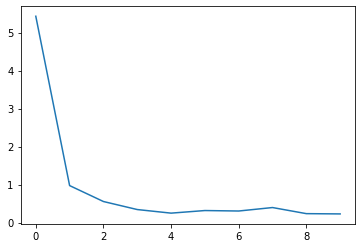

In [10]:
loss_curve=history.history["loss"]
plt.plot(loss_curve)
plt.show()

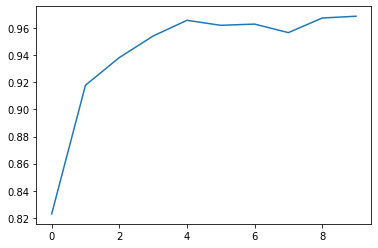

In [11]:
acc_curve=history.history["accuracy"]
plt.plot(acc_curve)
plt.show()


In [12]:
model.save("read_number")


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: read_number/assets


In [13]:
new_model=tf.keras.models.load_model("read_number")
predictions=new_model.predict(images_test)
print(predictions)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.8770132e-28]
 [7.9764262e-10 5.4956564e-11 9.2459071e-01 ... 1.4705009e-06
  1.8478232e-02 2.5403710e-10]
 [2.1184158e-36 1.0000000e+00 9.7228158e-30 ... 1.1289990e-28
  3.7649873e-23 3.0958618e-22]
 ...
 [0.0000000e+00 1.4935333e-17 0.0000000e+00 ... 7.9774491e-06
  3.0394036e-27 1.0534217e-15]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.2375845e-38 2.5072936e-32 5.4779076e-35 ... 0.0000000e+00
  0.0000000e+00 6.0045796e-38]]


In [14]:
print(np.argmax(predictions[10]))

0


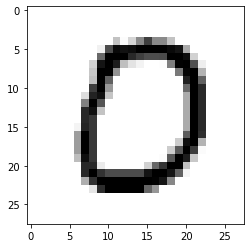

In [15]:
plt.imshow(images_test[10],cmap='binary')
plt.show()